In [6]:
!which python  

/home/abdelrahman-amgad/dev/AI/fire-detection/myenv/bin/python


In [10]:
import os
import random
import glob
import cv2
import matplotlib.pyplot as plt

In [12]:
# Path to dataset root
DATASET_DIR = "home-fire-dataset"

# Class names (edit if more classes exist)
class_names = {0: "flame", 1: "smoke"}
colors = {0: (255, 0, 0), 1: (0, 255, 0)}  # BGR colors for drawing

def load_labels(label_path, img_w, img_h):
    """Read YOLO txt file and return bounding boxes in pixel format."""
    boxes = []
    if not os.path.exists(label_path):
        return boxes
    with open(label_path, "r") as f:
        for line in f.readlines():
            cls, x_c, y_c, w, h = map(float, line.strip().split())
            cls = int(cls)
            # convert from YOLO normalized to pixel coordinates
            x_c, y_c, w, h = x_c * img_w, y_c * img_h, w * img_w, h * img_h
            x1 = int(x_c - w / 2)
            y1 = int(y_c - h / 2)
            x2 = int(x_c + w / 2)
            y2 = int(y_c + h / 2)
            boxes.append((cls, x1, y1, x2, y2))
    return boxes

def show_random_images(split="train", num_samples=5):
    """Show random images from dataset split with bounding boxes."""
    img_dir = os.path.join(DATASET_DIR, split, "images")
    lbl_dir = os.path.join(DATASET_DIR, split, "labels")

    img_files = glob.glob(os.path.join(img_dir, "*.jpg"))
    sample_files = random.sample(img_files, num_samples)

    for img_path in sample_files:
        fname = os.path.splitext(os.path.basename(img_path))[0]
        lbl_path = os.path.join(lbl_dir, fname + ".txt")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        boxes = load_labels(lbl_path, w, h)

        # Draw bounding boxes
        for cls, x1, y1, x2, y2 in boxes:
            cv2.rectangle(img, (x1, y1), (x2, y2), colors[cls], 2)
            cv2.putText(img, class_names[cls], (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, colors[cls], 2)

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{split.upper()} sample: {fname}")
        plt.show()

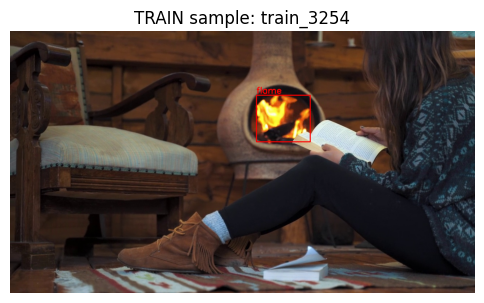

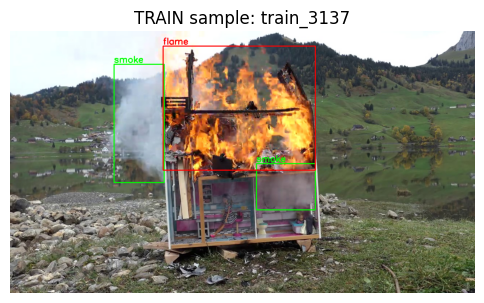

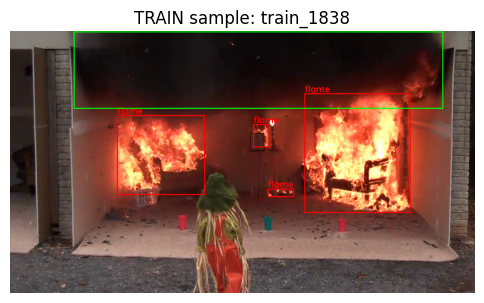

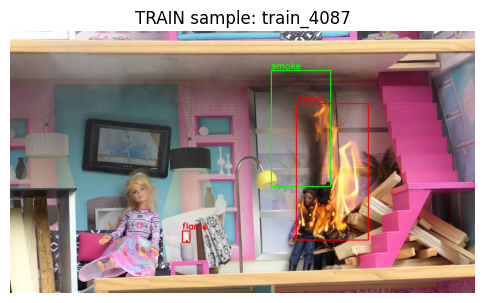

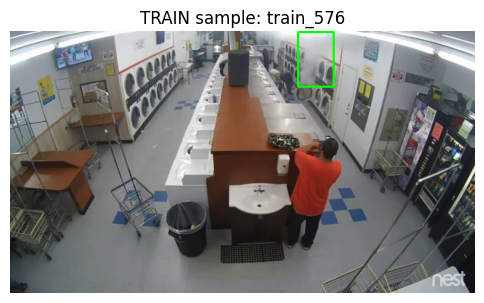

In [13]:
# 🔹 Example usage:
show_random_images("train", num_samples=5)  # Show 5 random training images